<h1>                           CSC398 Report: Participation in Big Data Conferences </h1>
<h3>Submitted by: Akshit Goyal (1005095068)</h3>

<br> 



                                           

### Introduction

The purpose of this report is to analyse the participation of people in a particularly chosen Big Data Conference i.e. IEEE International Conference on Big Data. The participation in technology is changing over the years. It is important to analyse the trends and address the issues of under representation of certain ethinic groups and genders. This report is an attempt to get an insight into how the community is represented and how its diversity changes over the years in the area of Big Data. To be specific, we will be looking at the years 2016-2020.

To achieve this, we will be testing multiple hypothesis. We will be testing the change in population, representation of genders and various ethnic groups. 

<b> Data Collection: </b> In order to test these hypothesis, we had to collect relevant data. This was achieved by a web scrapper tool called Scrapy to extract names from the conference websites. Further information on names like gender and race ethnicity was obtained using a paid API i.e. NamSor. 

### <b> Hypothesis: </b> Number of people attending the Big Data conference increases each year. 

The number of participants vary each year and the new technologies coming up rapidly and also new fields being introduced, it would interesting to test this hypothesis to measure the impact on Big Data conferences.

To test this, we will be using Linear Regression. <br>
First we will set our Null Hypothesis first. <br>

<b>Null Hypothesis:</b> Population remains the same over the years. <br>
This implies that our coeffecient of x i.e. B(Beta Value) in a linear regression model(y = Bx + c) must be 0. 

In the analysis, we will be using various python libraries for testing  this.  

#### Analysis

In [1]:
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [9]:
# Read population data from the CSV file.
data = pd.read_csv("population_data.csv")
data
# Year 1 corresponds to '2016' and similarly other index values map to consective years untill 2020 i.e. 5.

,Year,Population
0,1,330
1,2,400
2,3,470
3,4,445
4,5,446


In [3]:
data.describe()

,Year,Population
count,5.000000,5.000000
mean,3.000000,418.200000
std,1.581139,55.418408
min,1.000000,330.000000
25%,2.000000,400.000000
50%,3.000000,445.000000
75%,4.000000,446.000000
max,5.000000,470.000000


#### Define the dependent(y) and the independent variable(x1)

In [4]:
y = data['Population']
x1 = data['Year']

#### Explore the Data

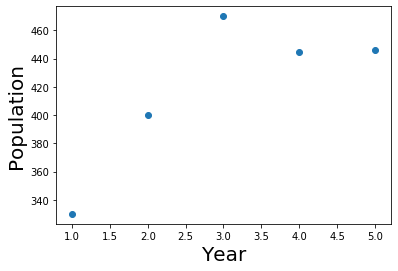

In [5]:
plt.scatter(x1,y) 
plt.xlabel('Year', fontsize = 20) 
plt.ylabel('Population', fontsize = 20)
plt.show()

Now we will plot a regression line on the above scatter plot.

#### Regression

In [6]:
x = sm.add_constant(x1) 
results = sm.OLS(y,x).fit()
results.summary()

/home/akki/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     4.991
Date:                Thu, 16 Jul 2020   Prob (F-statistic):              0.112
Time:                        13:53:54   Log-Likelihood:                -24.162
No. Observations:                   5   AIC:                             52.32
Df Residuals:                       3   BIC:                             51.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        335.1000     41.122      8.149      0.004     204.231     465.969
Year          27.7000     12.399      2.234      0.112     -11.758      67.158
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.533
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.464
Skew:                           0.596   Prob(JB):                        0.793
Kurtosis:                       2.103   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Plotting the Regression

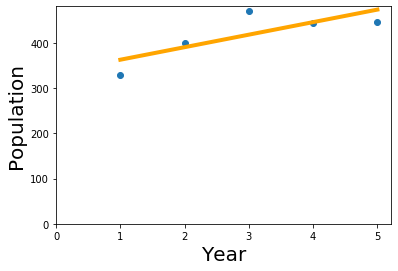

In [7]:
plt.scatter(x1,y) 
yhat = 27.7000*x1 + 335.1000 #These values are from Regression Table. 27.700 is Year coef and 335.1 is constant.
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line') 
plt.xlabel('Year', fontsize = 20) 
plt.ylabel('Population', fontsize = 20) 
plt.xlim(0)
plt.ylim(0)
plt.show()

We can see from the regression table and our graph that the B value(coeffecient of x) is non-zero. Therefore, our Null-Hypothesis is not true.  

This implies that the alternative hypothesis i.e. the population is changing each year. Since our B > 0, it must be increasing. 

Aditionally, to  verify our hypothesis we can look at the  p value. pvalue = 0.004 which means that this trend on increasing participation is not by chance. This also rejects are null hypothesis and supports our alternative hypothesis.

There is another important factor to note here that due COVID-19, the conference in 2020 (data point 5) must be rescheduled or does not represent the actual population data which might decrease the participation. However, we still see an increasing trend overall.

<b> Therefore, by linear regression and p-value, our hypothesis is valid for these data points. However, due to limited  amount of data (5 years) and possible bias in 2020 data, we cannot make a strong conclusion about increase in number of people attending the conference. </b>


<br>

### <b> Second Hypothesis: </b> The female participation in Big Data conferences has not improved over the years.

I decided to test this hypothesis because it is very crucial as womnen in tech are usually under-represented. It is important to analyse and study these data, so their participation can be encouraged more. Even though more and more women are being encouraged and welcomed in the tech field, I still feel they are under-represented.
<br>

In order to determine the gender of the participants, I used NamSor tool which tells me about the likely gender of each participant. 
It is important to note that I judged the accuracy of results of NamSor tool based on two evidences. First, I performed manual analysis of the known names whose genders I am aware about. It matched all the actual genders. 
Secondly, all the names have a confidence probabilty of over 0.96 which is very high. 

#### Data Representation

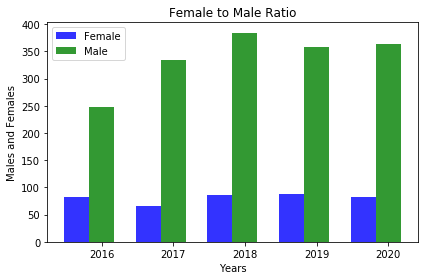

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# data to plot
# Read gender data from the CSV file.
gender_data = pd.read_csv("gender_data.csv")
gender_data
# Year 1 corresponds to '2016' and similarly other index values map to consective years untill 2020 i.e. 5.
x = gender_data["Year"]
y1 = gender_data["Male"]
y2 = gender_data["Female"]

# create a plot
fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, y2, bar_width,
alpha=opacity,
color='b',
label='Female')

rects2 = plt.bar(index + bar_width, y1, bar_width,
alpha=opacity,
color='g',
label='Male')

plt.xlabel('Years')
plt.ylabel('Males and Females')
plt.title('Female to Male Ratio')
plt.xticks(index + bar_width, 
           ('2016', '2017', '2018', '2019','2020'))
plt.legend()

plt.tight_layout()
plt.show()


Looking at the bar, graph we  can clearly see the under-representation of women in the technology especially in Big Data. However, we need to verify our claim statisticly. 

To verify my claim, I will be using Linear Regression and also look at the p-value after the analysis to support my claims.

Therefore, we need a Null Hypothesis and Alternative Hypothesis.

<b> Null Hypothesis: </b> The female ratio remains same over the years, i.e. B(beta) value which is co-effecient of x in linear regression remains 0.

<b> Alternative Hypothesis: </b> The female ratio changes over the years i.e. B != 0

#### Linear Regression

In [9]:
import statsmodels.api as sm
y3 = gender_data["Female Ratio"]
x1 = sm.add_constant(x) 
results = sm.OLS(y3,x1).fit()
results.summary()

/home/akki/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Female Ratio   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.011
Date:                Sat, 18 Jul 2020   Prob (F-statistic):              0.389
Time:                        00:31:56   Log-Likelihood:                 11.243
No. Observations:                   5   AIC:                            -18.49
Df Residuals:                       3   BIC:                            -19.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2272      0.035      6.571      0.007       0.117       0.337
Year          -0.0105      0.010     -1.005      0.389      -0.044       0.023
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.184
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.277
Skew:                          -0.341   Prob(JB):                        0.871
Kurtosis:                       2.070   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

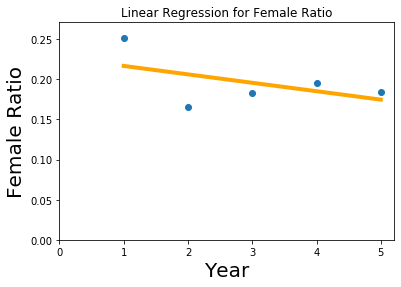

In [11]:
plt.scatter(x,y3) 
yhat = -0.0105*x + 0.2272 #These values are from Regression Table. 27.700 is Year coef and 335.1 is constant.
fig = plt.plot(x,yhat, lw=4, c='orange', label = 'regression line') 
plt.xlabel('Year', fontsize = 20) 
plt.ylabel('Female Ratio', fontsize = 20) 
plt.xlim(0)
plt.ylim(0)
plt.title('Linear Regression for Female Ratio')
plt.show()

#### Results
We can see from the regression table and our graph that the B value(coeffecient of x) is non-zero. Therefore, our Null-Hypothesis is not true. This implies that the female ratio is not constant over the years. 

Therefore, our Alternative Hypothesis is correct. Actually, the value of B = -0.0105 < 0. This is really discouraging as the it indicates that the participation of women is declining over the years in the field of Big Data. Even though the data points are less, the huge difference between the male and female ratio clearly represents the under-representation of women in tech. Therefore, the regression analysis supports our original hypothesis that female participation has not improved over the years.

<br>

Additionally, to validate our results, we will look at the p-value of the regression. The p-value is 0.007 which is very small that means we can rule out the possibility of getting this trend by chance. Additionally, smaller p-value means that our results are more inclind towards alternate hypothesis. <b>Therefore, we have successfully validated our results and can strongly conclude  based on these data points that women are under-represented in Big Data conferences.</b>

<br>

### <b>Hypothesis 3: The race ethnicity is unevenly distributed in the Big Data conferences.</b>

In any conference, there are people who come from different cultural backgrounds, different countries, and different race ethnicity. This is an important factor such as diversity that leads to diffrent prespectives in a conference. A dominant group also tends to lead the direction in which the future of the field goes. Therefore, I chose this hypothesis to further analyse the participation of various groups in conference. 

We used NameSor tool to determine the race ethnicity of the participants. The data is based on the race ethnicity of US. US being full of people and immigrants from various cultures and race should be a good data set to determine the likely ethnicity of the participants.

<b> Data Representation </b>

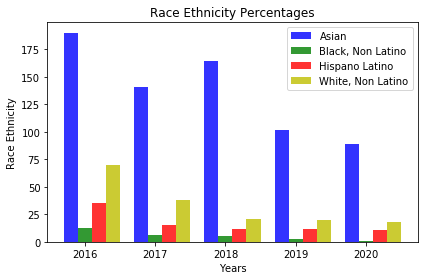

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# data to plot
# Read ethnicity data from the CSV file.
ethnicity_data = pd.read_csv("ethnicity_data.csv")

# Year 1 corresponds to '2016' and similarly other index values map to consective years untill 2020 i.e. 5.
x = ethnicity_data["Year"]
y1 = ethnicity_data["Asian"]
y2 = ethnicity_data["Black, Non Latino"]
y3 = ethnicity_data["Hispano Latino"]
y4 = ethnicity_data["White, Non Latino"]


# create a plot
fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, y1, bar_width,
alpha=opacity,
color='b',
label='Asian')

rects2 = plt.bar(index + bar_width, y2, bar_width,
alpha=opacity,
color='g',
label='Black, Non Latino')

rects3 = plt.bar(index + 2*bar_width, y3, bar_width,
alpha=opacity,
color='r',
label='Hispano Latino')

rects2 = plt.bar(index + 3*bar_width, y4, bar_width,
alpha=opacity,
color='y',
label='White, Non Latino')

plt.xlabel('Years')
plt.ylabel('Race Ethnicity')
plt.title('Race Ethnicity Percentages')
plt.xticks(index + bar_width, 
           ('2016', '2017', '2018', '2019','2020'))
plt.legend()

plt.tight_layout()
plt.show()


Looking at the bar, graph we  can clearly see the race ethnicity distribution is not equal in the technology especially in Big Data. However, we need to verify our claim statisticly. 

To verify my claim, I will be using ANOVA F-test (Analysis of Variance).

Therefore, we need a Null Hypothesis and Alternative Hypothesis.

<b> Null Hypothesis: </b> The race ethnicity distribution is equal i.e. mean of each race group is equal.

<b> Alternative Hypothesis: </b> Atleast one race group's mean is different. 

#### ANOVA F-Test

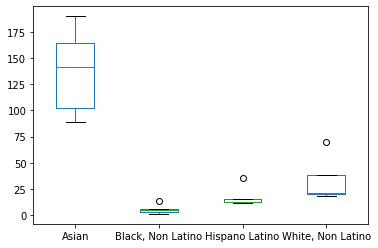

In [18]:
# generate a boxplot to see the data distribution by race. Using boxplot, we can easily detect the differences 
# between different race ethnicity.
ethnicity_data.boxplot(column=['Asian', 'Black, Non Latino', 'Hispano Latino', 'White, Non Latino'], grid=False)

In [19]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(ethnicity_data['Asian'], ethnicity_data['Black, Non Latino'], 
                                ethnicity_data['Hispano Latino'], ethnicity_data['White, Non Latino'])
print(fvalue, pvalue)

30.63952673339499 7.261651535717692e-07


<b> Result </b>

Here we can clearly see that the result of <b>pvalue = 7.261651535717692e-07 </b>(P < 0.05). This implies that there is significant difference in the means of the all the race groups. Therefore, our null hypothesis is rejected. Our alternative hypothesis that atleast one group has different mean is accepted. Observing the graphs, I can clearly see Asian community dominating this space. The same observation was supported by our analysis. 

Another interesting point to note here is that, even though it is dominated by Asians, the conference in all the years were held in different cities across the US. The reason of this spike could be due to high participation of local Asian community or the representation of the international coommunity. Another possible reason could be, the field of Big Data is led by Asian ccommunity as it seems very popular amongsts them. <b>Therefore, our original  hypothesis is verified.</b>

<br>



### Summary

In our report, we tested various hypothesis to determine the diveristy in participation of people in Big Data Conderences. In particular, we saw that population is increasing. We also saw that the ratio women attending these conferences is declining which is very concerning and needs to be addressed. Finally, we saw that according to the participation in this particular conference, we can say Asians are the most dominant ethnic group leading the field of Big Data. However, there could be multiple biases to this result due to many unknown factors. Therefore, in order to make a strong conclusion about this, we need to match the same trends with another conference in the same field.